# Description of the Notebook

In [1]:
import roundtrip_path_planner
import IPTestSuiteSS2023

# Definition StartPos, TargetPosList, Environment

Aufruf des Benchmarks, der Startpos und TargetPosList (wie im IP-X-0-Automated_PlannerTest.ipynb)

In [2]:
import importlib
importlib.reload(roundtrip_path_planner)

<module 'roundtrip_path_planner' from '/home/moritz_s/Documents/RKIM_1/Roboterprogrammierung/Projektarbeit_Robot_Path_Planning/Roundtrip_Path_Planning/roundtrip_path_planner/roundtrip_path_planner.py'>

visibilityPRM_custom [<class 'IPVisibilityPRM_Customized.VisPRM_Custom'>, {'ntry': 300}, <function visibilityPRMVisualize at 0x759d91736ca0>]
Planning: visibilityPRM_custom - Trap
Usedstart: [10, 15]
Pastgoals: [[12, 6], [10, 3], [8, 4]]
tmp_1: [[10, 15]]
tmp_2: [[12, 6]]
Test_1
Test_2
Test_3
Test_9
Test_10


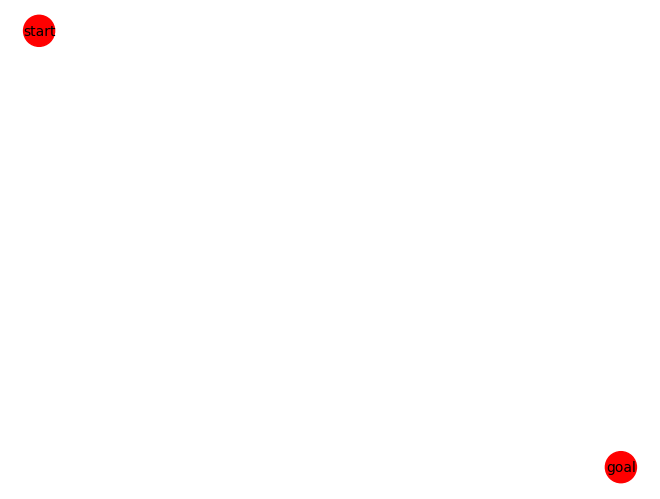

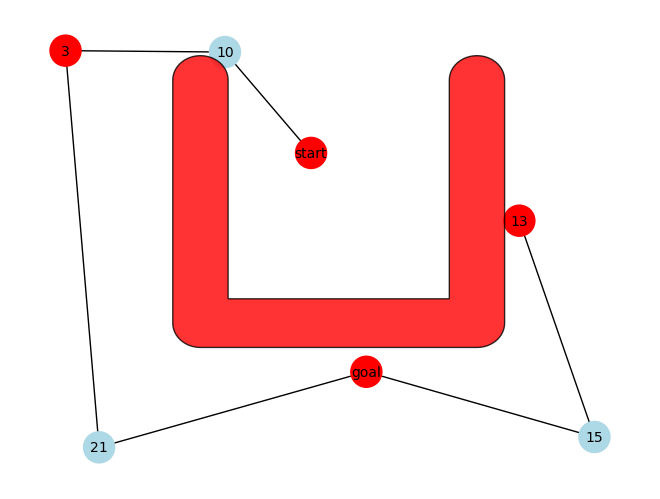

Test_11
Solution_Visibility ist ['start', 10, 3, 21, 'goal']
T1
T2
hallo
Visualizing error for planner visibilityPRM_custom: Node 'start' has no position.
Exception details: Node 'start' has no position.
New Usedstart: [12, 6]
Usedstart: [12, 6]
Pastgoals: [[12, 6], [10, 3], [8, 4]]
tmp_1: [[12, 6]]
tmp_2: [[10, 3]]
Test_1
Test_2
Test_3
Test_4
Test_5
Test_6
Test_7
Test_8
T1
T2
hallo
Visualizing error for planner visibilityPRM_custom: Node 'start' has no position.
Exception details: Node 'start' has no position.
New Usedstart: [10, 3]
Usedstart: [10, 3]
Pastgoals: [[12, 6], [10, 3], [8, 4]]
tmp_1: [[10, 3]]
tmp_2: [[8, 4]]
Test_1
Test_2
Test_3
Test_4
Test_5
Test_6
Test_7
Test_8
T1
T2
hallo
Visualizing error for planner visibilityPRM_custom: Node 'start' has no position.
Exception details: Node 'start' has no position.
New Usedstart: [8, 4]
Resultlist solution: ['start', 10, 3, 21, 'goal']
Resultlist solution: ['start', 'goal']
whole solution: ['-10-15-', 10, 3, 21, '-12-6-', '-10-3-', '

AttributeError: 'int' object has no attribute 'startswith'

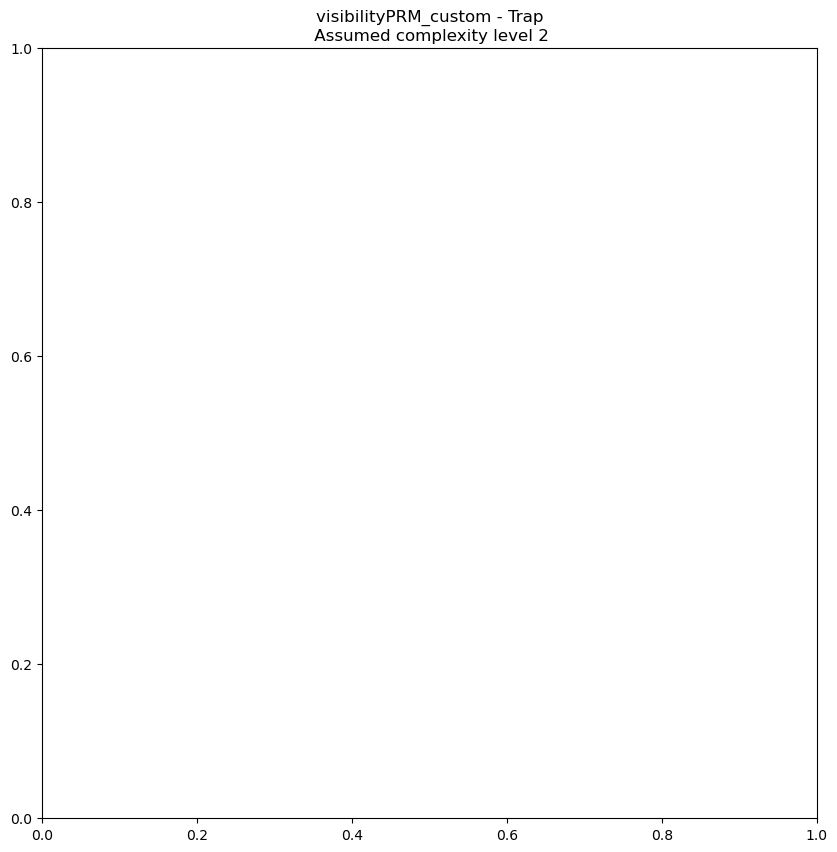

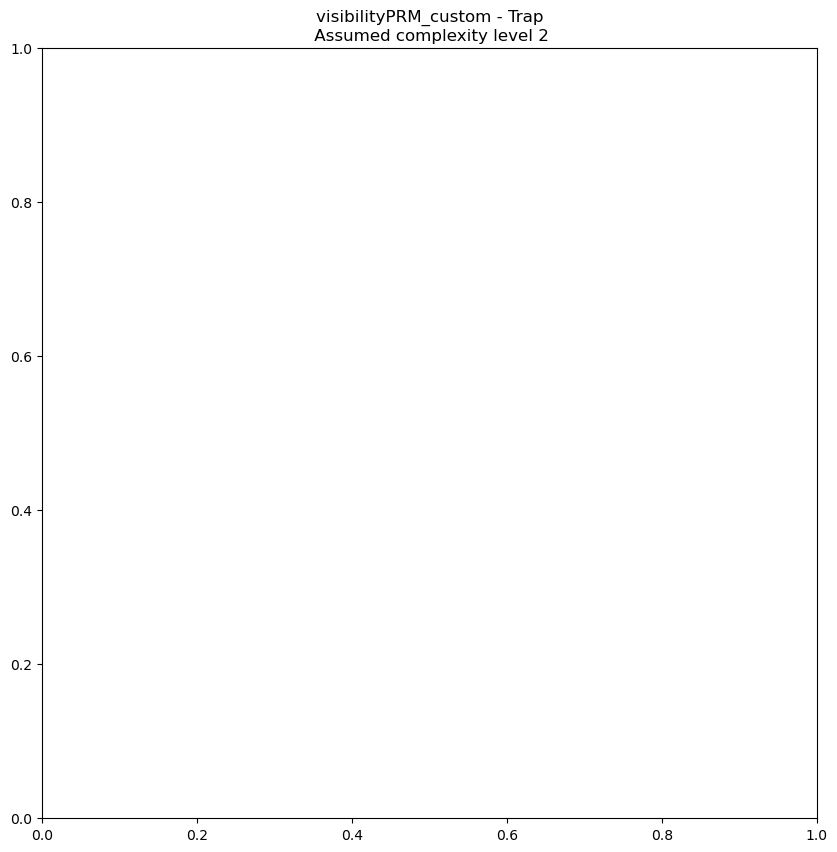

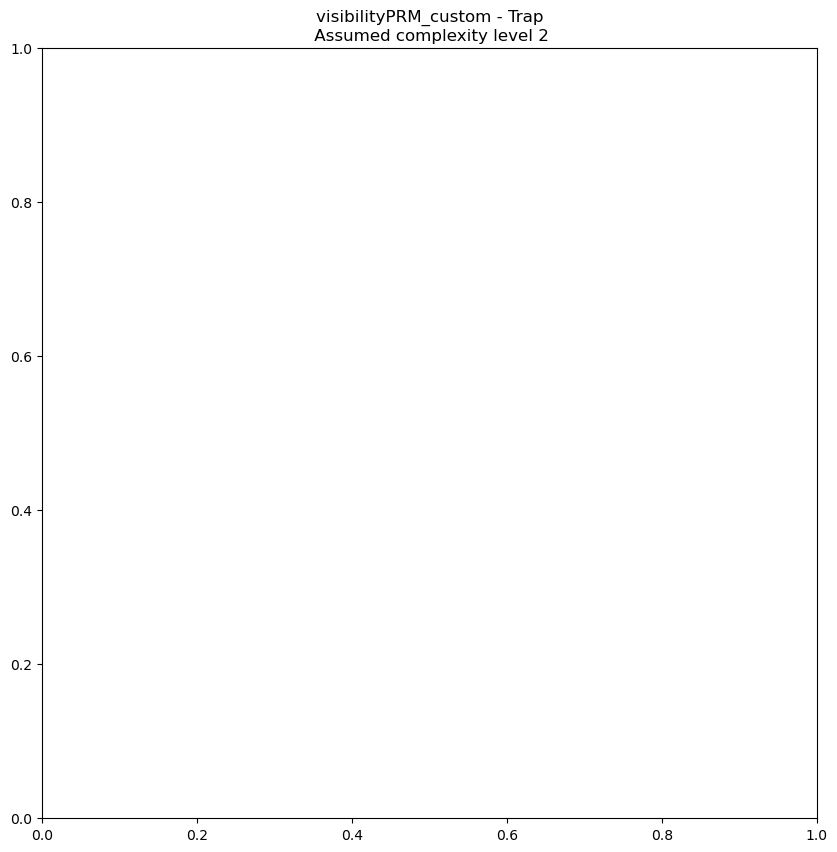

In [3]:
######
# Test
######

fullBenchList = IPTestSuiteSS2023.benchList
Environment_Test = fullBenchList[0]

test_startlist =[[10,15]] 
test_goallist = [[10,3], [12,6], [8,4]]

# Planen = roundtrip_path_planner.Roundtrip_Path_Planner(Environment_Test.startList, Environment_Test.goalList, Environment_Test ,"basePRM")
Planen = roundtrip_path_planner.Roundtrip_Path_Planner(test_startlist, test_goallist, Environment_Test ,"visibilityPRM_custom")
Planen.plan()
